In [3]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import IPython.display as ipd  


In [32]:
file_path = 'F:\\01 Code\\01 Projects\\SpeechEmotionRecognitionApp\\ser_model\\speech-emotion-recognition-ravdess-data\\Actor_01\\03-01-01-01-01-01-01.wav'
audio, sr = librosa.load(file_path,sr=4000)
# 44100


In [33]:
ipd.Audio(audio,rate=sr)

In [34]:
audio.shape

(13214,)

In [35]:
print("Sample Rate: ",sr)

Sample Rate:  4000


In [36]:
print("Time Duration Of Each Sample: ", 1/sr)

Time Duration Of Each Sample:  0.00025


In [37]:
print("Total Time Duration of Audio: ", (1/sr)*len(audio))

Total Time Duration of Audio:  3.3035


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_5740/1988201826.py:3: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ans =  librosa.feature.rms(audio);


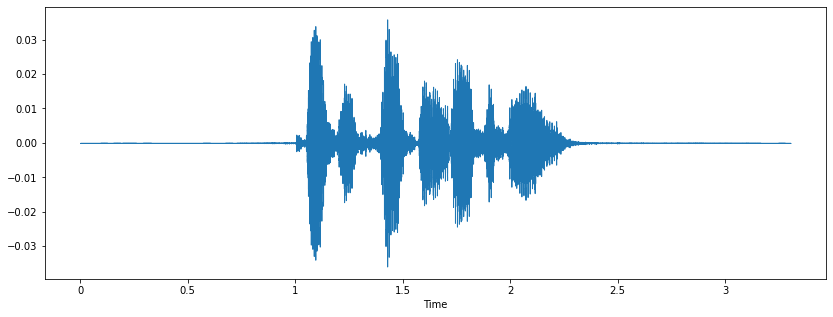

In [38]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)
ans =  librosa.feature.rms(audio);



# 1024
# 512

In [39]:
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

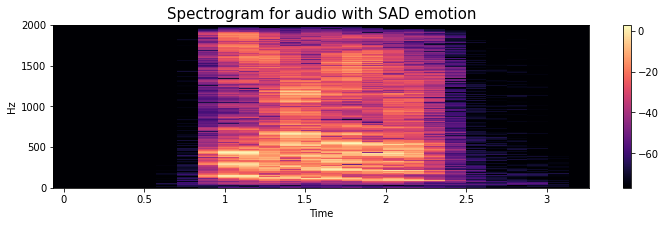

In [40]:
create_spectrogram(audio,sr,"SAD")

In [44]:
def extract_feature(audio, mfcc, chroma, mel):
    print(audio)
    X = audio
    sample_rate=sr
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [46]:
 my_audio_feature = extract_feature(audio,mfcc=True,chroma=True,mel=True)

[0. 0. 0. ... 0. 0. 0.]


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_5740/1645599543.py:15: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


In [42]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [20]:



emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['calm', 'happy', 'fearful', 'disgust']




In [53]:

def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("F:\\01 Code\\01 Projects\\SpeechEmotionRecognitionApp\\ser_model\\speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x),np.array(y), test_size=test_size,train_size=1-test_size, random_state=9)



In [54]:

x_train,x_test,y_train,y_test=load_data(test_size=0.25)

print((x_train.shape[0]  , x_test.shape[0]))
print(f'Features extracted: {x_train.shape[1]}')

model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

model.fit(x_train,y_train)

F:\01 Code\01 Projects\SpeechEmotionRecognitionApp\ser_model\speech-emotion-recognition-ravdess-data\Actor_01\03-01-02-01-01-01-01.wav


ParameterError: Audio data must be of type numpy.ndarray

In [23]:
model.predict([my_audio_feature])

array(['happy'], dtype='<U7')

In [24]:
my_audio_feature.reshape(-1,1)
my_audio_feature.shape

(180,)

In [25]:
my_audio_feature


array([-3.21139862e+02,  1.53090296e+01, -6.05748749e+01,  8.73025227e+00,
       -3.64073982e+01,  2.46134710e+00, -1.14265327e+01,  3.79088831e+00,
       -1.70246601e+01,  1.84857388e+01, -3.33865213e+00,  1.64108505e+01,
       -1.49989882e+01,  3.49872828e+00, -5.17079782e+00, -9.65443492e-01,
       -2.28414917e+00,  7.64596891e+00, -2.20411348e+00,  6.45985723e-01,
        4.05298328e+00,  1.23415890e+01,  4.87133503e+00,  2.51663971e+00,
       -8.91331494e-01, -3.43456960e+00, -2.61899900e+00,  7.94875908e+00,
       -6.61321759e-01, -3.92757535e+00,  1.99230766e+00,  2.68509603e+00,
        6.09710836e+00,  8.56430113e-01, -1.59422100e+00,  1.75195129e-03,
       -2.65448594e+00, -2.27067137e+00, -2.20825505e+00, -2.33665204e+00,
        2.45858803e-01,  3.12011540e-01,  4.83664423e-01,  3.69958967e-01,
        3.90246481e-01,  4.77520436e-01,  5.83084524e-01,  5.72415948e-01,
        4.05110836e-01,  4.43592876e-01,  3.27836215e-01,  3.14065069e-01,
        5.01195528e-03,  